# HETG Grating Comparison

This notebook does a comparison between the grating efficiencies from the Chandra calibration files and the original conception of the grating efficiency.

In [2]:
import pathlib
import astropy.io.fits
import astropy.table
import astropy.units as u
import astropy.constants as const
from astropy.visualization import quantity_support
import numpy as np
import matplotlib.pyplot as plt

from mocksipipeline.detector.response import SpectrogramChannel

In [3]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x293520460>

In [4]:
def read_ge_table(filename, hdu=1):
    tab = astropy.table.QTable.read(filename, hdu=hdu)
    orders = np.arange(-11, 12, 1, dtype=int)
    all_ge = tab['EFF'].data
    for i,o in enumerate(orders):
        tab[f'efficiency_{o}'] = all_ge[:,i]
    tab.remove_column('EFF')
    tab.remove_column('SYS_MIN')
    tab.rename_column('ENERGY', 'energy')
    tab['wavelength'] = (const.h * const.c / tab['energy']).to('Angstrom')
    return tab

In [5]:
hetg_files = (pathlib.Path.home() / 'Downloads').glob('*hetg*.fits')
for f in hetg_files:
    for hdu in [1,2,3,4]:
        tab = read_ge_table(f, hdu=hdu)
        print(tab.meta['CDES0001'], tab.meta['DATE'])

HETG (MEG) efficiency vs order, shell 1 2005-10-19T20:58:31
HETG (MEG) efficiency vs order, shell 3 2005-10-19T20:58:31
HETG (HEG) efficiency vs order, shell 4 2005-10-19T20:58:31
HETG (HEG) efficiency vs order, shell 6 2005-10-19T20:58:31
HETG (MEG) efficiency vs order, shell 1 2009-01-09T22:19:02
HETG (MEG) efficiency vs order, shell 3 2009-01-09T22:19:02
HETG (HEG) efficiency vs order, shell 4 2009-01-09T22:19:02
HETG (HEG) efficiency vs order, shell 6 2009-01-09T22:19:02
HETG (MEG) efficiency vs order, shell 1 2011-10-25T19:03:50
HETG (MEG) efficiency vs order, shell 3 2011-10-25T19:03:50
HETG (HEG) efficiency vs order, shell 4 2011-10-25T19:03:50
HETG (HEG) efficiency vs order, shell 6 2011-10-25T19:03:50


I guess that we should just be using the most up-to-date calibration?

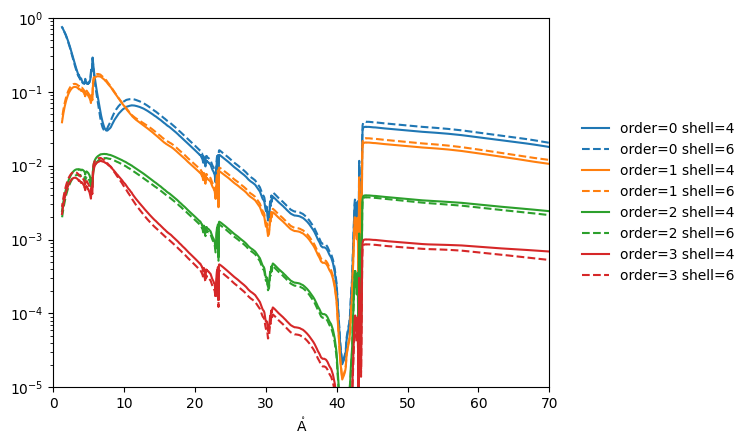

In [7]:
plt.figure()
for order in np.arange(0,4,1):
    for hdu,ls in zip([3,4], ['-', '--', ':', '-.']):
        tab = read_ge_table('/Users/wtbarnes/Downloads/hetgD1996-11-01greffpr001N0007.fits', hdu=hdu)
        #tab_6 = read_ge_table('/Users/wtbarnes/Downloads/hetgD1996-11-01greffpr001N0006.fits', hdu=hdu)
        #tab_7 = read_ge_table('/Users/wtbarnes/Downloads/hetgD1996-11-01greffpr001N0007.fits', hdu=hdu)
        shell = tab.meta['CDES0001'].split()[-1]
        plt.plot(tab['wavelength'], tab[f'efficiency_{order}'],
                 label=f'order={order} shell={shell}', color=f'C{order}', ls=ls)
        #plt.plot(tab_6['wavelength'], tab_6[f'efficiency_{order}'], label=f'order={order}',
        #         ls='--', color=line.get_color())
        #plt.plot(tab_7['wavelength'], tab_7[f'efficiency_{order}'], label=f'order={order}',
        #         ls=':', color=line.get_color())
    plt.yscale('log')
    plt.xlim(0,70)
    plt.ylim(1e-5,1)
    plt.legend(frameon=False, loc='center right', bbox_to_anchor=(1.4, 0.5))
    #plt.title(f'{tab.meta["CDES0001"]} {tab.meta["DATE"]}')

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


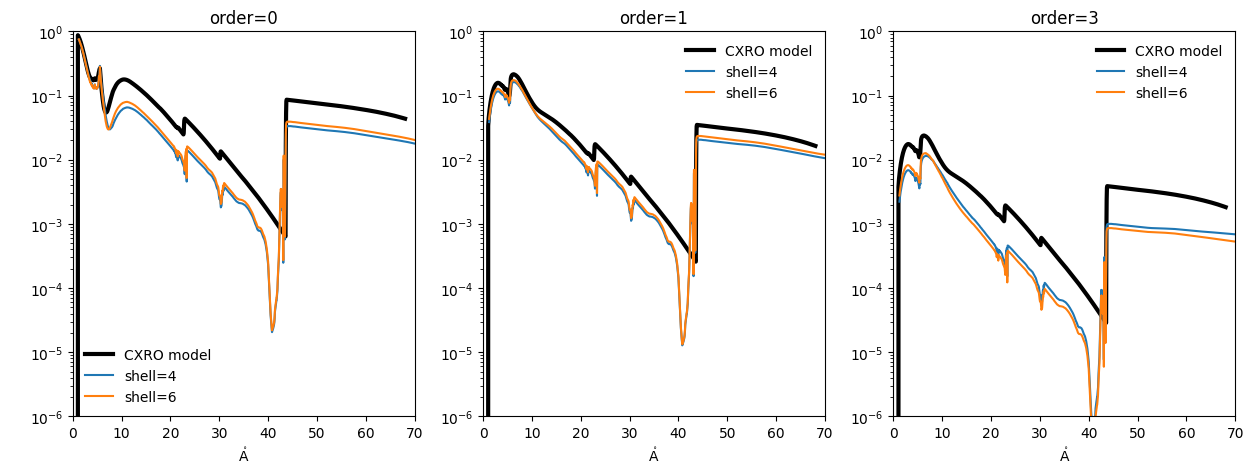

In [8]:
fig = plt.figure(figsize=(15,5))
for i,order in enumerate([0,1,3]):
    ax = fig.add_subplot(1,3,i+1)
    chan = SpectrogramChannel(order)
    ax.plot(chan.wavelength, chan.grating_efficiency, label='CXRO model', color='k', ls='-', lw=3)
    for hdu in [3,4]:
        tab = read_ge_table('/Users/wtbarnes/Downloads/hetgD1996-11-01greffpr001N0007.fits', hdu=hdu)
        shell = tab.meta['CDES0001'].split()[-1]
        plt.plot(tab['wavelength'], tab[f'efficiency_{order}'], label=f'shell={shell}',)
    ax.set_yscale('log')
    ax.set_xlim(0,70)
    ax.set_ylim(1e-6,1)
    ax.set_title(f'order={order}')
    ax.legend(frameon=False)